# Author -: Akash Dasgupta

This notebook comprises of a very famous dataset known as Titanic Dataset. The analysis will be done on the members who actually travelled into the titanic (i.e Members survived or history) . Let's have a little bit of information of the dataset.

## Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

So, this dataset contails all the valid informations of the passengers.

Hence atlast we will perform the logistic regression to predict (0 or 1) Survived or Not Survived or the Discrete Values of test data.

## Import modules

The modules are used below, if in case not installed just run this command on the terminal or Anaconda Navigator. !pip install "Module name". 1) Numpy -: for numerical operations. 2) pandas -: for creating dataframe out of csv, as by reading a csv file. 3) seaborn -: for graphical representations. 4) matplotlib -: for graphical representations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I have downloaded the dataset of titanic dataset that is train and test, hence we will use test to make the predictions. As more data makes the accuracy boom!

## Load the dataset
Dataset is being loaded using pd.read_csv() function as we have the dataset in csv format. Then we will display some of the data from the head and tail or from the beginning or last, by specifying data.head() and data.tail() function. By passing a numerical value as the parameters we can give or tell the machine, the number of rows to load on.

In [2]:
data = pd.read_csv(r'C:\Users\Adin\Desktop\Datasets\titanic_train.csv')

Now let's take a look at the datasets 

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling

Let's us now look at the statistical information using the describe function.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can look at the count values above at the age section means, it is less valued than others, there are null values present. Now lets us look to the datatype information, by having data.info() it will also show us the non-null values and the datatype.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


By the info() function we can see how many non-null values are present in the datasets, hence we need to clean the data before feeding it into the algorithm. Hence, let us look at the null values how much is present in the whole dataset.

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see here 177 values in the age section are null. hence we will replace those values with the mean age values. By using data.fillna() method. It actually fills the null value place withe value we give to its parameters. Let's explore this now.
Let us look at the heatmap of the dataset.

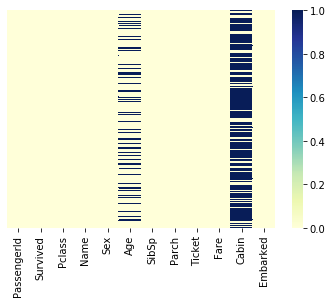

In [7]:
sns.heatmap(data.isnull(),cmap='YlGnBu',yticklabels=False)
plt.show()

In [8]:
data['Age'].fillna(data['Age'].mean(), inplace =True)
data['Cabin'].fillna('',inplace =True)
data['Embarked'].fillna('',inplace =True)

In [9]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

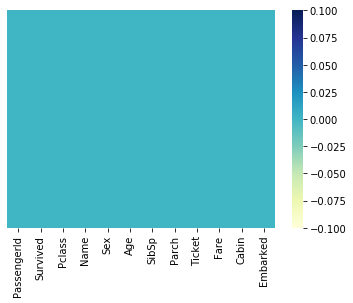

In [10]:
sns.heatmap(data.isnull(),cmap='YlGnBu',yticklabels=False)
plt.show()

Above result has shown us that the dataset is perfectely cleaned now, Hence it is now well Preprocessed. 
Now our dataset is ready for the EDA, hence let us explore the exploratory data analysis.

# Exploratory Data Analysis

We will start the analysis with the basic that's the counterplot.
Therefore, we will be counting how many people survived in the ship using the x variable to be set as the data['Survived']

Hence the below result shows the discrete values of people survived(1) qand died(0)
We can analyse that mostly people did not survived. 

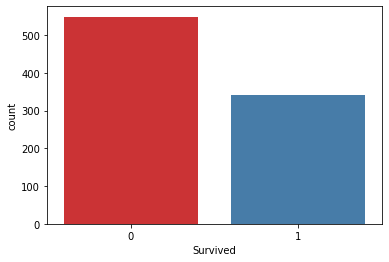

In [11]:
sns.countplot(x=data['Survived'],palette="Set1")
plt.show()

Now, let us throw some light on the categories of people survived. Hence, we will obtain how many people survived among males and female. It can be obtained by using a counterplot, same way how we did. 

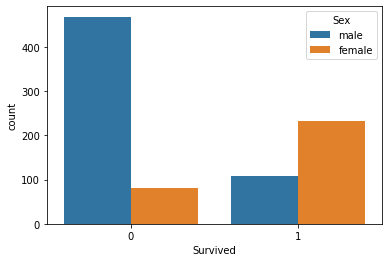

In [12]:
sns.countplot(x='Survived',data=data, hue='Sex')
plt.show()

We can now observe here that mostly the females survived and mostly males didn't survived. (Pyaar ka chakkar babubahiya!) 

Now let us obtain the relationship between the class the passenger survived.

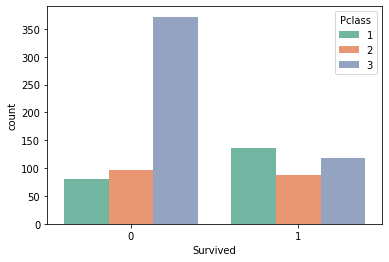

In [13]:
sns.countplot(x='Survived', hue='Pclass', palette='Set2',data=data)
plt.show()

Hence we can see here that mostlythe passengers from 3rd class died and passengers from 1st classes survived.
May be people were diffrentiated between rich and poor.

Let us see the distribution plot.
At first we will be looking at the distribution plot of the age, How aged people were distributed in the titanic ship.

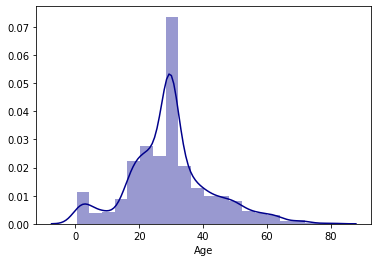

In [14]:
sns.distplot(data['Age'],kde=True,color='darkblue',bins=20)
plt.show()

We can see it forms a bell shaped but a little of right skewed, we will even explore the kurtosis and skewness of the ages below, what are the values basically.
The values are normally distributed but there are some outliers present we will explore them later on the box plot.

In [15]:
kurtosis = data['Age'].kurt()
skewness = data['Age'].skew()
print('Kurtosis -:',kurtosis)
print('Skewness -:',skewness)

Kurtosis -: 0.9662793026645233
Skewness -: 0.4344880940129925


Now, we will look at the count plot of the siblings and spouse, Generally means How many people had 0 Spouse and Siblings and How many were with their respective number of spouse and siblings.

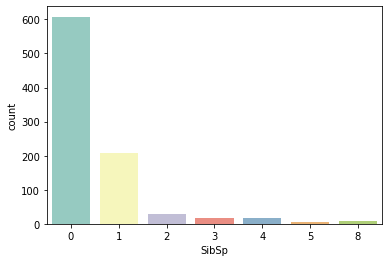

In [16]:
sns.countplot(x='SibSp',data=data,palette='Set3')
plt.show()

Mostly we can analyse that the people count were almost equal to 600, who were single, and then the peoples were around 200 who had one siblings or spouse. 1 is basically with respect to spouse.

Let's rather scrolling up again we will have a small look at the data here itself.

In [17]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S


Here, we can even see that fair is a numerical value, lets explore the ticket fair here using histogram. The average fair of the people who bought tickets.

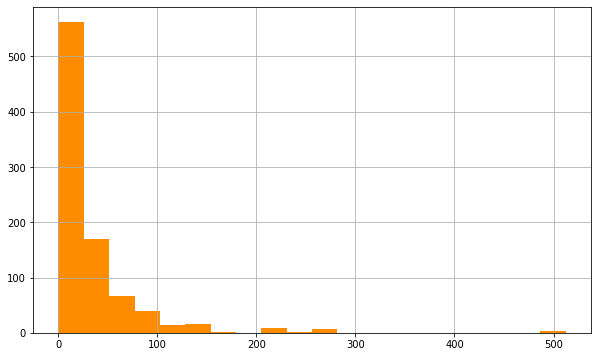

In [18]:
data['Fare'].hist(color='darkorange',bins=20,figsize=(10,6))

Now, we will look at the outliers and handle them respectively, Lets look at the box plots to analyse the outliers.

We hence also can obtain the relationship between the passenger class and the age. Let's see how they are connected.
The box bottom means 25% value, the middle line is average 50% value and the top line of the box gives the 75% of the value.

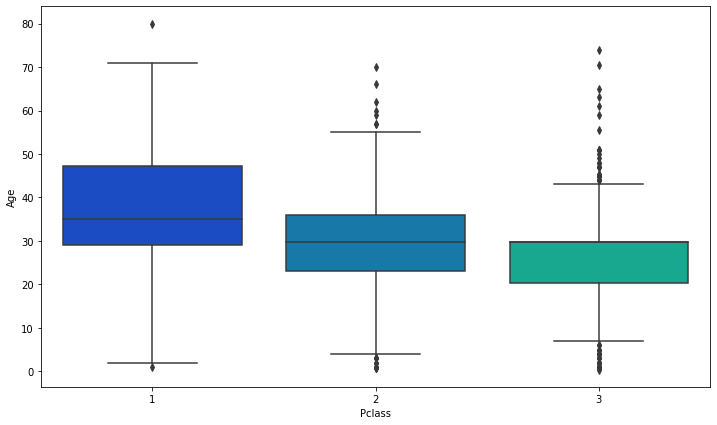

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')
plt.show()

Hence there are some outliers and we need to remove those outliers. Let's take the info of the dataset again.

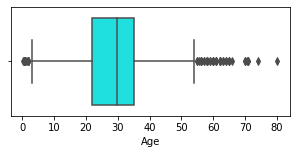

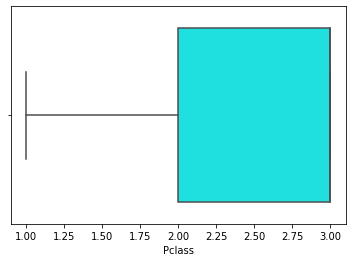

In [20]:
plt.subplots( figsize=(5,2))
key = ['Age','Pclass']
for items in key:
    sns.boxplot(x=data[items],data=data,color='cyan')
    #sns.boxplot(x=data['citric acid'],data=data)
    #sns.boxplot(x=data['residual sugar'],data=data)
    #sns.boxplot(x=data['chlorides'],data=data)
    plt.show()

In [21]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Therefore, we must remove the outliers from the age column.

In [22]:
data['Age'] = np.where(data['Age']>= 35, 35, data['Age'])

In [23]:
data['Age'] = np.where(data['Age']<=22,22,data['Age'])

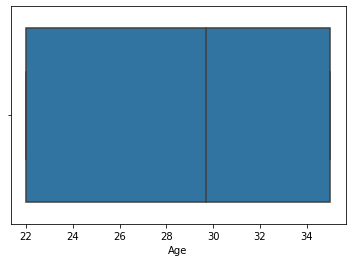

In [24]:
sns.boxplot(data['Age'],data=data)
plt.show()

Hence the outliers are removed.

Now we are a bit farther from training the data. At last we going to convert some of our data items into categorical features. 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let us now convert the two categories of sex into the integer format.
We can do this using an in-built function in pandas called get_dummies().

In [26]:
data['Sex'] = pd.get_dummies(data['Sex'],drop_first=True)

In [27]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,35.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,,S


Hence we can see it is now converted into the categorical variables as 1 for male and 0 for female.

Similarly we will apply this function to embarked column.

## What is the embarked in titanic dataset?
-> The values in embarked is generaly S, C and Q, generally means Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [28]:
Embarked = pd.get_dummies(data['Embarked'], drop_first=False).head()

In [29]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,35.0,1,0,PC 17599,71.2833,C85,C


Now we are ready to perform thelogistic regression, just we have to select the x-features and the y-prediction values wich we will be doing below. 

In [30]:
newdata = data.drop(columns=['Sex','Name','Ticket','Embarked','Cabin'])

In [31]:
newdata.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,35.0,1,0,71.2833


Now we have dropped the embarked column which was basically the letters now we will concat the categorical values for those embarked column into our dataset.

In [32]:
newdata = pd.concat([newdata,Embarked],axis=1)

In [33]:
newdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,0.0,1.0
1,2,1,1,35.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,0.0,0.0,0.0,1.0


In [34]:
x = data.drop(['Survived','Name','Ticket','Fare','Cabin','Embarked'],axis=1)

In [35]:
y = data['Survived']

In [36]:
print(x.shape)
print(y.shape)
x

(891, 6)
(891,)


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22.000000,1,0
1,2,1,0,35.000000,1,0
2,3,3,0,26.000000,0,0
3,4,1,0,35.000000,1,0
4,5,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0
887,888,1,0,22.000000,0,0
888,889,3,0,29.699118,1,2
889,890,1,1,26.000000,0,0


## Applying Logistic Regression

Logistic Regression is used for categorical values predictions or the discrete values predictions.
We have here the discrete values survived or not, hence we will be using 1 for survived and 0 for did not survived, therefore we have to call the logistic regression module from sklearn library.

Also before applying the regression we have to do a train test split, and at last we will have to look at our accuracy how we developed it from before.

So, let's start with the train-test split.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predict = model.predict(xtest)

Upto here we had made a model of logistic regression and also used our splitted values of xtrain and ytrain to train the model.

## Confusion Matrix

Now we will import the confusion matrix from the sklearn, what this matrix does is it allows us to check how the model actually predicted, and what is the true predictions.

In simple words how our model is working how many wrong predictions and true predictions our model made.

In [42]:
from sklearn.metrics import confusion_matrix
# Now we will pass the predictions and true values to our confusion matrix and check how is the prediction.

In [43]:
accuracy = confusion_matrix(ytest,predict)

In [44]:
accuracy

array([[138,  16],
       [ 40,  74]], dtype=int64)

Let's now check the % of accuracy, How much % our model is accurate about!

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy = accuracy_score(ytest,predict)

In [47]:
print('Accuracy -: ',accuracy*100)

Accuracy -:  79.1044776119403


In [48]:
predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

## Test Data Prediction

Now we will do the same for the test data for the titanic which is provided to us seperately,

Applying the same functions for reading the data, preprocessing and wrangling the data we will make the predictions on that.

In [49]:
test_data = pd.read_csv(r'C:\Users\Adin\Desktop\Datasets\titanic_test.csv')

In [50]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [51]:
test_data['Sex'] = pd.get_dummies(test_data['Sex'], drop_first = True)

In [52]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [53]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
test_data.fillna(test_data['Age'].mean(),inplace=True)

In [55]:
x_test = test_data.drop(['Name','Ticket','Fare','Cabin','Embarked'],axis=1)

In [56]:
new_predictions = model.predict(x_test)

In [57]:
new_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Hence, These are the people who survived and did not Survived!